<a href="https://colab.research.google.com/github/sonjoy1s/kaggle_project/blob/main/Final_Global_Air_Quality_(2025)_6_Cities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor, StackingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [ ]:
df = pd.read_csv("/content/Air_Quality.csv")
df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2025-01-01 00:00:00+00:00,Brasilia,325.0,21.1,2.5,35.0,15.4,15.6,20.483337
1,2025-01-01 01:00:00+00:00,Brasilia,369.0,20.8,2.7,35.0,15.1,15.3,20.425000
2,2025-01-01 02:00:00+00:00,Brasilia,419.0,20.4,3.0,34.0,15.6,15.8,20.333332
3,2025-01-01 03:00:00+00:00,Brasilia,451.0,20.5,3.1,33.0,16.4,16.6,20.258335
4,2025-01-01 04:00:00+00:00,Brasilia,458.0,22.1,3.0,29.0,17.7,17.8,20.316668


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52560 non-null  object 
 1   City    52560 non-null  object 
 2   CO      52560 non-null  float64
 3   NO2     52560 non-null  float64
 4   SO2     52560 non-null  float64
 5   O3      52560 non-null  float64
 6   PM2.5   52560 non-null  float64
 7   PM10    52560 non-null  float64
 8   AQI     52560 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.6+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CO,52560.0,245.269711,146.926588,52.0,155.000000,206.000000,288.000000,1621.00000
NO2,52560.0,24.129863,19.323853,0.0,9.400000,18.900000,33.700000,127.10000
SO2,52560.0,15.485135,24.794611,0.3,1.900000,5.200000,20.400000,478.00000
O3,52560.0,64.416267,35.054135,0.0,41.000000,60.000000,84.000000,288.00000
PM2.5,52560.0,17.246579,15.429194,0.0,5.800000,11.900000,23.500000,104.30000
PM10,52560.0,28.553288,36.877058,0.0,7.600000,14.400000,33.900000,470.30000
AQI,52560.0,41.236672,22.740643,7.6,23.600002,33.475001,59.949994,152.24835


In [ ]:
df.shape

(52560, 8)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(52560, 9)

In [ ]:
df['City'].nunique()

6

In [ ]:
df.columns

Index(['Date', 'City', 'CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI'], dtype='object')

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
X = df.drop('AQI', axis=1)
y = df['AQI']

In [ ]:
numerical_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include=object).columns

In [ ]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: Index(['CO', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10'], dtype='object')
Categorical columns: Index(['City'], dtype='object')


In [ ]:
!pip install feature_engine

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

num_pipe = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='median')),
         ('log', FunctionTransformer(func=np.log1p, validate=False)),
        ('scaler', StandardScaler())
    ]
)

In [ ]:
cat_pipe = Pipeline(
    [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [ ]:
combine_pipe = ColumnTransformer(
    [
        ('num', num_pipe, numerical_cols),
        ('cat', cat_pipe, categorical_cols)
    ]
)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#base learner

lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
ada = AdaBoostRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()
cat = CatBoostRegressor()

In [ ]:
# used voting

voting_rg = VotingRegressor(
    estimators=[
        ('lr', lr),
        ('rf', rf),
        ('gb', gb)
    ]
)

In [ ]:
stacking_rg = StackingRegressor(
    estimators=[
    ('lr', lr),
    ('dt', dt),
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb)
    ]
)

In [ ]:
model_train = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boost': gb,
    'AdaBoost': ada,
    'Voting Regressor': voting_rg,
    'Stacking Regressor': stacking_rg

}

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Store results
results = []

# Loop through all regression models
for name, model in model_train.items():
    # Create pipeline: combine preprocessing pipeline + model
    pipe = Pipeline([
        ('preprocessing', combine_pipe),
        ('regressor', model)
    ])

    # Fit the model
    pipe.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipe.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)


    # Store results in dictionary
    results.append({
        'Model Name': name,
        'R2 Score': r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    })

# Convert results to DataFrame and sort by R2 Score
result_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

print(result_df)


           Model Name  R2 Score        MAE         MSE       RMSE
0  Stacking Regressor  0.904554   4.002721   49.341727   7.024367
1       Random Forest  0.904271   3.998260   49.487883   7.034762
2      Gradient Boost  0.881543   4.720524   61.237553   7.825443
3    Voting Regressor  0.880959   5.360107   61.539046   7.844683
4       Decision Tree  0.813685   5.020545   96.317116   9.814128
5   Linear Regression  0.769738   8.385044  119.035999  10.910362
6            AdaBoost  0.723379  10.417529  143.001364  11.958318


Best Model: Stacking Regressor
R² Score: 0.9049
Mean_absolute_error: 3.9896
Mean_squared_error: 49.1434
RMSE: 7.0102


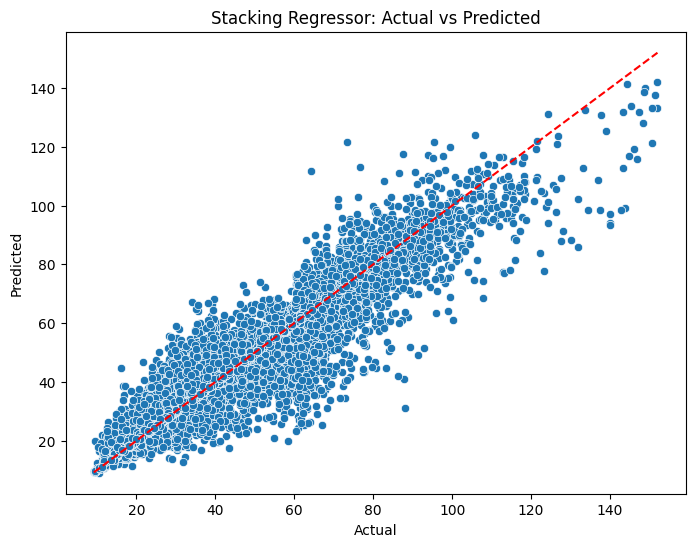

In [ ]:
best_model_name = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model_name]

# 2️⃣ Create final pipeline
final_pipe = Pipeline([
    ('Combine_pipe', combine_pipe),  # your numeric + categorical preprocessing
    ('regressor', best_model_obj)
])

# 3️⃣ Fit the final model
final_pipe.fit(X_train, y_train)

# 4️⃣ Predict on test set
y_final_pred = final_pipe.predict(X_test)

# 5️⃣ Evaluate metrics
r2 = r2_score(y_test, y_final_pred)
mae = mean_absolute_error(y_test, y_final_pred)
mse = mean_squared_error(y_test, y_final_pred)
rmse = np.sqrt(mse)

print(f"Best Model: {best_model_name}")
print(f"R² Score: {r2:.4f}")
print(f"Mean_absolute_error: {mae:.4f}")
print(f"Mean_squared_error: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# 6️⃣ Optional: plot predicted vs actual
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_final_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'{best_model_name}: Actual vs Predicted')
plt.show()


In [160]:
# Crossn Validation
rf_cross_pipe = Pipeline(
    [
        ('preprocessing', combine_pipe),
        ('regressor', RandomForestRegressor())
    ]
)

In [167]:
cross_val_scores_rf = cross_val_score(rf_cross_pipe,X_train,y_train,scoring='r2',cv=5)

print("Cross Value Score 5 cv",cross_val_scores_rf)

Cross Value Score 5 cv [0.89941433 0.90383018 0.90519039 0.90401078 0.9097423 ]


In [165]:
print("Cross Value Score Mean",cross_val_scores_rf.mean())

Cross Value Score Mean 0.9039632251655456


In [166]:
print("Cross value Score Std",cross_val_scores_rf.std())

Cross value Score Std 0.0031623507674291606


In [168]:
stacking_rg_cross_pipe = Pipeline(
    [
        ('preprocessing', combine_pipe),
        ('regressor', stacking_rg)
    ]
)

In [169]:
cross_value_scores_stg = cross_val_score(stacking_rg_cross_pipe,X_train,y_train,scoring='r2',cv=5)


In [170]:
print("Cross Value Score Stacking 5 cv =",cross_value_scores_stg)

Cross Value Score Stacking 5 cv = [0.89992289 0.90447267 0.90552877 0.90434103 0.90961184]


In [171]:
print("Cross Value Score Stacking Mean =",cross_value_scores_stg.mean())

print("Cross Value Score Stacking Std =",cross_value_scores_stg.std())

Cross Value Score Stacking Mean = 0.9047754415700024
Cross Value Score Stacking Std = 0.0030914680740318826


In [172]:
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [174]:
grid_search = GridSearchCV(
    estimator= stacking_rg_cross_pipe,
    param_grid=param_grid,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)


In [ ]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
